# Curve Fitting

In [319]:
import sklearn.datasets as skdat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import scipy.interpolate as interp
from scipy.optimize import curve_fit
%matplotlib inline


#importing dataset

cereal = pd.read_excel('cereal.xlsx')



def manipulate(x):
    """ Manipulating the dataset by removing unnecessary columns for plotting and inspection purposes"""
    
    x=x.transpose() 
    x=x.rename(columns=x.iloc[0]) 
    x=x.rename(columns={"Country Name":"Year"}) 
    x=x.dropna(axis=1,how='all') 
    x=x.drop(x.index[0:42]) 
    x=x.drop(x.index[21:23]) 
    x=x.reset_index(drop=True) 
    x=x.fillna(0)
    
    return x



#apply the function defined from above

cereal=manipulate(cereal)


#### Defining my columns of choice from dataset

In [345]:


cerealfr = cereal['France'] #picking column france for cereal dataset

greenhousefr = greenhouse['France'] #column france for greenhouse gases

year = cereal['Year'] # taking the column years for plotting



[ 1.24026781e+05 -1.43065830e-03]


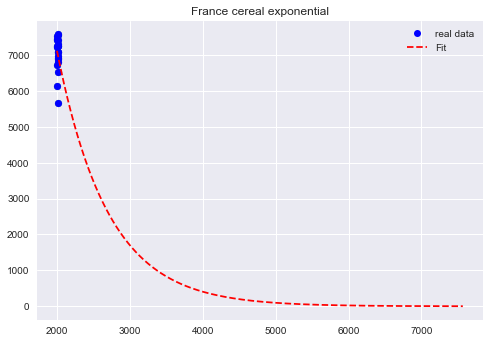

In [330]:
def expg(x,a,b):
    """ Exponent function which i am going to be use for curve fit"""
    return a*np.exp(b*x)

plt.style.use('seaborn') 
asd= np.sqrt(cerealfr) #error for square root of my values

plt.plot(year,cerealfr,'bo',label='real data')


"""curve fit with the appropriate initial guess 
   and maxfev=1000 in order to get it to work """

popt,_=curve_fit(expg,year,cerealfr,sigma=asd,p0=[10000,0.001],maxfev=1000) 

a, b = popt

plt.scatter(year,cerealfr)

x_line = np.arange(min(year), max(cerealfr), 1) #fine grid

y_line = expg(x_line, a, b)

plt.title('France cereal exponential')

plt.plot(x_line, y_line, '--', color='red',label='Fit')
plt.legend()
plt.show()

[-5.15851155e-36  5.00000011e-02]


C:\Users\keith\AppData\Local\Temp/ipykernel_2612/2852795484.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x)


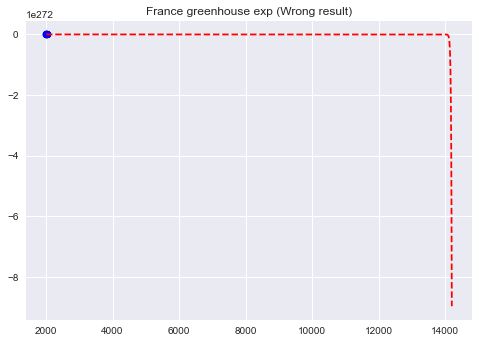

In [344]:
"""same concept as the cell above but for greenhouse unfortunately i can not produce
   the correct plot hence this is the best i could do for this indicator greenhouse"""

plt.style.use('seaborn')

asds= np.sqrt(greenhousefr)

plt.plot(year,greenhousefr,'bo',label='real data')

popst,_=curve_fit(expg,year,greenhousefr,sigma=asds,p0=(1e-10,0.05),maxfev=1000)

a, b = popst

plt.scatter(year,greenhousefr)

x_lines = np.arange(min(year), max(greenhousefr), 1)

y_lines = expg(x_lines, a, b)

plt.plot(x_lines, y_lines, '--', color='red')
plt.title('France greenhouse exp (Wrong result)')  # show that this is not the right plot
plt.show()

### Finding the values in 10 years for each indicators

In [343]:
tweny8=x_line[30] #year 2028
twenyy8=y_line[30] #value at 2028

ty=x_line[34] #year 2032
tv=y_line[34] #value at 2032 for cereal

print('For year',tweny8,'The cereal yield value will be:',twenyy8)
print('For year',ty,'The cereal yield value will be:',tv)


For year 2028.0 The cereal yield value will be: 6814.975626561471
For year 2032.0 The cereal yield value will be: 6776.087398496637
